<a href="https://colab.research.google.com/github/Rosefinch-Midsummer/Awesome-Colab/blob/master/NLP/Spacy_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[官网](https://spacy.io/)

[ Industrial-strength Natural Language Processing (NLP) with Python and Cython](https://github.com/explosion/spaCy)

[如何用Python处理自然语言？（Spacy与Word Embedding）](https://zhuanlan.zhihu.com/p/36768778)

[demo-spacy-text-processing](https://github.com/wshuyi/demo-spacy-text-processing/blob/master/demo.ipynb)

In [0]:
!pip install en_core_web_lg
#!pip install en_core_sci_lg
#!pip install <model_s3_url>
#import spacy, scispacy

import en_core_web_lg
#import en_core_sci_lg
#nlp = en_core_sci_lg.load()
nlp=en_core_web_lg.load()
#doc=nlp(text)

In [1]:
import spacy

text = "The sequel, Yes, Prime Minister, ran from 1986 to 1988. In total there were 38 episodes, of which all but one lasted half an hour. Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker. Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013."

nlp = spacy.load('en')
doc = nlp(text)

for token in doc:
    print('"' + token.text + '"')

"The"
"sequel"
","
"Yes"
","
"Prime"
"Minister"
","
"ran"
"from"
"1986"
"to"
"1988"
"."
"In"
"total"
"there"
"were"
"38"
"episodes"
","
"of"
"which"
"all"
"but"
"one"
"lasted"
"half"
"an"
"hour"
"."
"Almost"
"all"
"episodes"
"ended"
"with"
"a"
"variation"
"of"
"the"
"title"
"of"
"the"
"series"
"spoken"
"as"
"the"
"answer"
"to"
"a"
"question"
"posed"
"by"
"the"
"same"
"character"
","
"Jim"
"Hacker"
"."
"Several"
"episodes"
"were"
"adapted"
"for"
"BBC"
"Radio"
","
"and"
"a"
"stage"
"play"
"was"
"produced"
"in"
"2010"
","
"the"
"latter"
"leading"
"to"
"a"
"new"
"television"
"series"
"on"
"UKTV"
"Gold"
"in"
"2013"
"."


In [2]:
doc

The sequel, Yes, Prime Minister, ran from 1986 to 1988. In total there were 38 episodes, of which all but one lasted half an hour. Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker. Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013.

In [3]:
for token in doc[:10]:
    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
        token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_
    ))

The	0	the	False	False	Xxx	DET	DT
sequel	4	sequel	False	False	xxxx	NOUN	NN
,	10	,	True	False	,	PUNCT	,
Yes	12	yes	False	False	Xxx	INTJ	UH
,	15	,	True	False	,	PUNCT	,
Prime	17	Prime	False	False	Xxxxx	PROPN	NNP
Minister	23	Minister	False	False	Xxxxx	PROPN	NNP
,	31	,	True	False	,	PUNCT	,
ran	33	run	False	False	xxx	VERB	VBD
from	37	from	False	False	xxxx	ADP	IN


In [4]:
for ent in doc.ents:
    print(ent.text, ent.label_)

1986 DATE
1988 DATE
38 CARDINAL
one CARDINAL
half an hour TIME
Jim Hacker PERSON
BBC Radio ORG
2010 DATE
UKTV Gold ORG
2013 DATE


In [5]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

In [6]:
for sent in doc.sents:
    print(sent)

The sequel, Yes, Prime Minister, ran from 1986 to 1988.
In total there were 38 episodes, of which all but one lasted half an hour.
Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker.
Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013.


In [7]:
doc.sents

In [8]:
list(doc.sents)

[The sequel, Yes, Prime Minister, ran from 1986 to 1988.,
 In total there were 38 episodes, of which all but one lasted half an hour.,
 Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker.,
 Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013.]

In [0]:
newdoc = nlp(list(doc.sents)[0].text)

In [10]:
for token in newdoc:
    print("{0}/{1} <--{2}-- {3}/{4}".format(
        token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))

The/DT <--det-- sequel/NN
sequel/NN <--nsubj-- ran/VBD
,/, <--punct-- sequel/NN
Yes/UH <--intj-- sequel/NN
,/, <--punct-- sequel/NN
Prime/NNP <--compound-- Minister/NNP
Minister/NNP <--appos-- sequel/NN
,/, <--punct-- ran/VBD
ran/VBD <--ROOT-- ran/VBD
from/IN <--prep-- ran/VBD
1986/CD <--pobj-- from/IN
to/IN <--prep-- from/IN
1988/CD <--pobj-- to/IN
./. <--punct-- ran/VBD


In [11]:
displacy.render(newdoc, style='dep', jupyter=True, options={'distance': 90})

In [24]:
#!python3 -m spacy download en_core_web_lg
#import en_core_web_sm
#nlp = en_core_web_sm.load()
#nlp = spacy.load('en_core_web_sm')
print(nlp.vocab['minister'].vector)

[-3.2239e-01  3.8982e-01  6.4522e-01  8.7596e-02  4.0262e-01 -4.1253e-01
  1.3804e-01 -4.0226e-01 -3.0679e-01  3.6520e+00 -6.1745e-01 -2.4114e-01
  1.7488e-01 -2.5995e-01 -3.8512e-01 -1.3747e-01 -3.7446e-01 -8.0867e-01
  2.8081e-01  2.9735e-01  1.7901e-01 -3.4726e-02  7.2466e-02 -5.2111e-01
  7.1858e-02  1.5913e-01 -6.0877e-01  1.6604e-01 -9.3809e-02  2.0030e-01
 -5.0653e-01 -1.4978e-01  1.7742e-01  3.2996e-02 -2.1082e-01 -6.0442e-02
 -9.6639e-02 -4.6054e-01 -7.1622e-02 -1.4829e-01  5.1362e-01 -3.7840e-01
 -3.2035e-01 -1.1593e-01 -1.5887e-01  2.5999e-01  2.6821e-01  2.7429e-01
 -5.8973e-02 -1.0218e-01  6.6629e-03  3.5737e-01  3.1083e-01  4.7950e-01
  4.4323e-01  8.0089e-03  6.4577e-02 -4.1851e-01  3.2589e-01 -6.0894e-01
 -3.5944e-01  1.9116e-01  1.5910e-02 -1.8912e-01  1.2646e-01 -9.6918e-03
 -6.5529e-01 -4.1851e-01  4.0244e-01 -6.7241e-01 -7.6219e-01  2.6207e-01
 -1.5607e+00  3.2982e-01 -4.1586e-01  3.4098e-01 -1.2571e-01 -1.2014e-01
  1.3608e-02 -1.7894e-01  5.0916e-01 -2.8449e-01 -1

In [0]:
dog = nlp.vocab["dog"]
cat = nlp.vocab["cat"]
apple = nlp.vocab["apple"]
orange = nlp.vocab["orange"]

In [26]:
dog.similarity(cat)

0.80168545

In [27]:
dog.similarity(apple)

0.26339024

In [28]:
dog.similarity(orange)

0.2742508

In [29]:
apple.similarity(orange)

0.56189173

In [0]:
from scipy.spatial.distance import cosine

In [31]:
1 - cosine(dog.vector, cat.vector)

0.8016855120658875

In [0]:
def vector_similarity(x, y):
    return 1 - cosine(x, y)

In [33]:
vector_similarity(dog.vector, apple.vector)

0.2633902430534363

In [0]:
def make_guess_word(words):
    [first, second, third] = words
    return nlp.vocab[first].vector - nlp.vocab[second].vector + nlp.vocab[third].vector

In [0]:
def get_similar_word(words, scope=nlp.vocab):
    
    guess_word = make_guess_word(words)

    similarities = []

    for word in scope:
        if not word.has_vector:
            continue

        similarity = vector_similarity(guess_word, word.vector)
        similarities.append((word, similarity))


    similarities = sorted(similarities, key=lambda item: -item[1])
    print([word[0].text for word in similarities[:10]])

In [36]:
words = ["king", "queen", "woman"]
get_similar_word(words)

['MAN', 'Man', 'mAn', 'MAn', 'MaN', 'man', 'mAN', 'WOMAN', 'womAn', 'WOman']


In [37]:
words = ["Paris", "London", "England"]
get_similar_word(words)

['france', 'FRANCE', 'France', 'Paris', 'paris', 'PARIS', 'EUROPE', 'EUrope', 'europe', 'Europe']


In [38]:
import numpy as np
embedding = np.array([])
word_list = []

for token in doc:
    if not(token.is_punct) and not(token.text in word_list):
        word_list.append(token.text)
word_list

['The',
 'sequel',
 'Yes',
 'Prime',
 'Minister',
 'ran',
 'from',
 '1986',
 'to',
 '1988',
 'In',
 'total',
 'there',
 'were',
 '38',
 'episodes',
 'of',
 'which',
 'all',
 'but',
 'one',
 'lasted',
 'half',
 'an',
 'hour',
 'Almost',
 'ended',
 'with',
 'a',
 'variation',
 'the',
 'title',
 'series',
 'spoken',
 'as',
 'answer',
 'question',
 'posed',
 'by',
 'same',
 'character',
 'Jim',
 'Hacker',
 'Several',
 'adapted',
 'for',
 'BBC',
 'Radio',
 'and',
 'stage',
 'play',
 'was',
 'produced',
 'in',
 '2010',
 'latter',
 'leading',
 'new',
 'television',
 'on',
 'UKTV',
 'Gold',
 '2013']

In [39]:
for word in word_list:
    embedding = np.append(embedding, nlp.vocab[word].vector)

embedding.shape

(18900,)

In [40]:
embedding = embedding.reshape(len(word_list), -1)

embedding.shape

(63, 300)

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE()
low_dim_embedding = tsne.fit_transform(embedding)

In [42]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
def plot_with_labels(low_dim_embs, labels, filename='tsne.pdf'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)

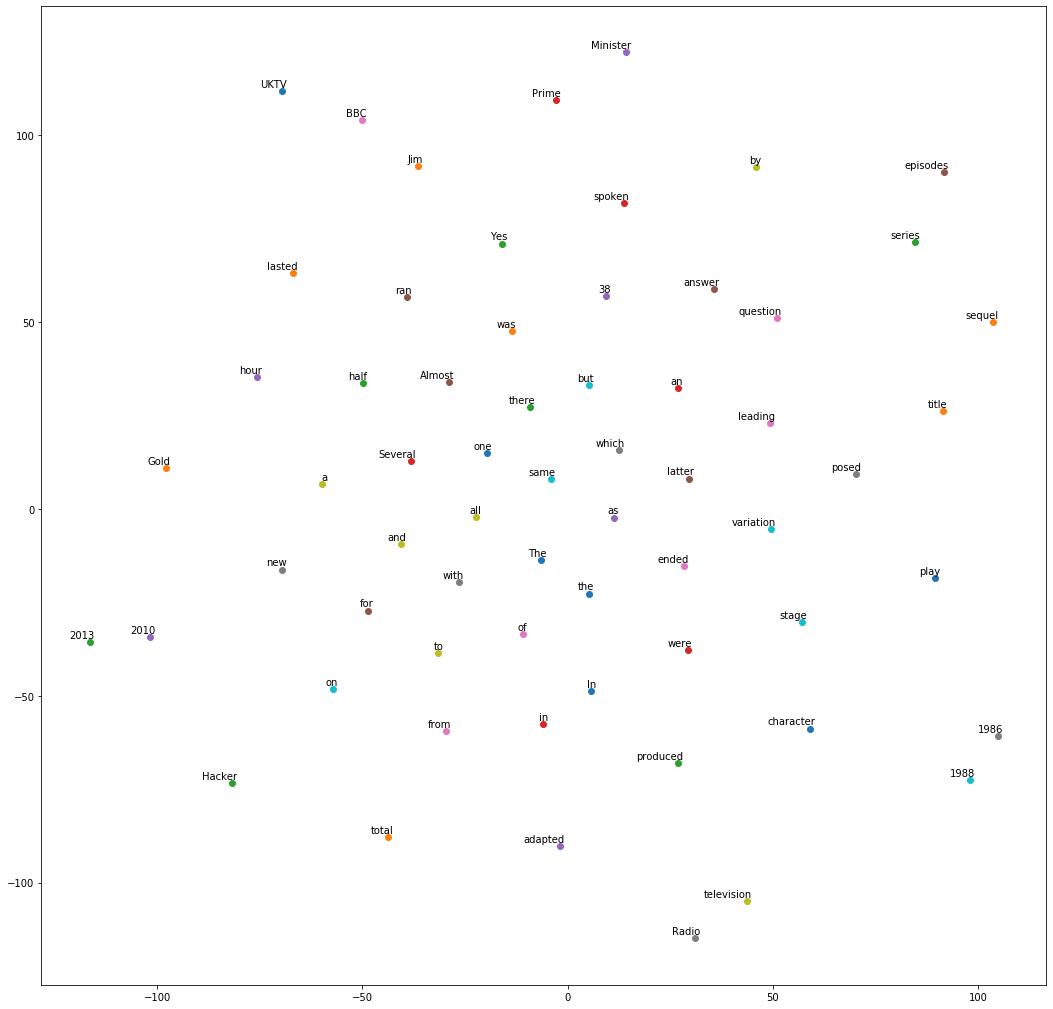

In [44]:
plot_with_labels(low_dim_embedding, word_list)